# Problem1


## 1.

number of features: 10

number of instances: 58k

number of classes: 7

number of numerical features: 9

number of categorical features: 1


In [ ]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt

file = 'shuttle.arff'
data, meta = arff.loadarff(file)
df = pd.DataFrame(data)
df.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,class
0,50.0,21.0,77.0,0.0,28.0,0.0,27.0,48.0,22.0,b'2'
1,55.0,0.0,92.0,0.0,0.0,26.0,36.0,92.0,56.0,b'4'
2,53.0,0.0,82.0,0.0,52.0,-5.0,29.0,30.0,2.0,b'1'
3,37.0,0.0,76.0,0.0,28.0,18.0,40.0,48.0,8.0,b'1'
4,37.0,0.0,79.0,0.0,34.0,-26.0,43.0,46.0,2.0,b'1'


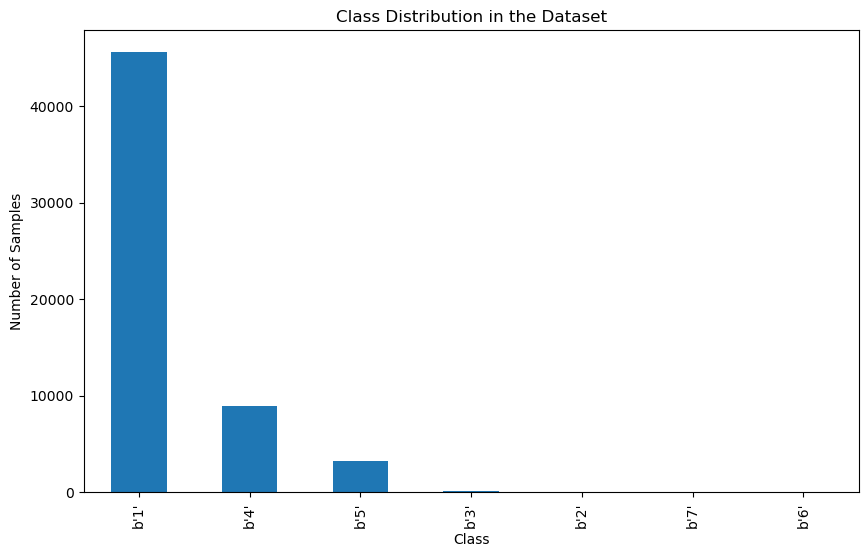

In [ ]:
class_distribution = df['class'].value_counts()
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

From the plot, the dataset is not balanced.

## 2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import numpy as np

df['class'] = df['class'].astype(str)

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rate = np.arange(0.1,1.1,0.1)
results = []


for i in rate:
    if i == 1:
        X_train_sub, y_train_sub = X_train, y_train
    else:
        X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=i, random_state=42)
    dt = DecisionTreeClassifier(random_state=42)
    gb = GradientBoostingClassifier(random_state=42)

    start_time = time.time()
    dt.fit(X_train_sub, y_train_sub)
    dt_time = time.time() - start_time

    dt_predictions = dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_predictions)

    start_time = time.time()
    gb.fit(X_train_sub, y_train_sub)
    gb_time = time.time() - start_time

    gb_predictions = gb.predict(X_test)
    gb_accuracy = accuracy_score(y_test, gb_predictions)

    results.append({
        "Subset Percentage": i * 100,
        "Decision Tree Accuracy": dt_accuracy,
        "Decision Tree Training Time (s)": dt_time,
        "Gradient Boosting Accuracy": gb_accuracy,
        "Gradient Boosting Training Time (s)": gb_time
    })

result_final = pd.DataFrame(results)
result_final

,Subset Percentage,Decision Tree Accuracy,Decision Tree Training Time (s),Gradient Boosting Accuracy,Gradient Boosting Training Time (s)
0,10.0,0.998190,0.011374,0.998448,2.560427
1,20.0,0.998879,0.016519,0.998707,5.001385
2,30.0,0.999052,0.030858,0.998879,7.147016
3,40.0,0.999310,0.042046,0.999310,9.529971
4,50.0,0.999397,0.054137,0.999138,12.087452
5,60.0,0.999397,0.064578,0.999483,14.370170
6,70.0,0.999397,0.083435,0.999569,16.774614
7,80.0,0.999310,0.096006,0.999569,22.254919
8,90.0,0.999483,0.110087,0.999569,21.103181
9,100.0,0.999483,0.119794,0.999569,23.910465


## 3

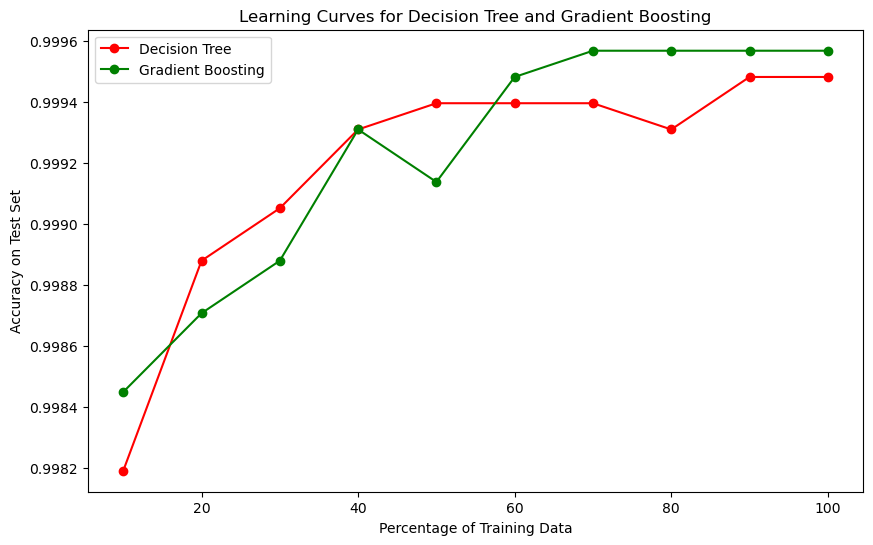

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(result_final['Subset Percentage'], result_final['Decision Tree Accuracy'], label='Decision Tree', marker='o', linestyle='-', color='red')

plt.plot(result_final['Subset Percentage'],result_final['Gradient Boosting Accuracy'], label='Gradient Boosting', marker='o', linestyle='-', color='green')

plt.title('Learning Curves for Decision Tree and Gradient Boosting')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Accuracy on Test Set')

plt.legend()

## 4

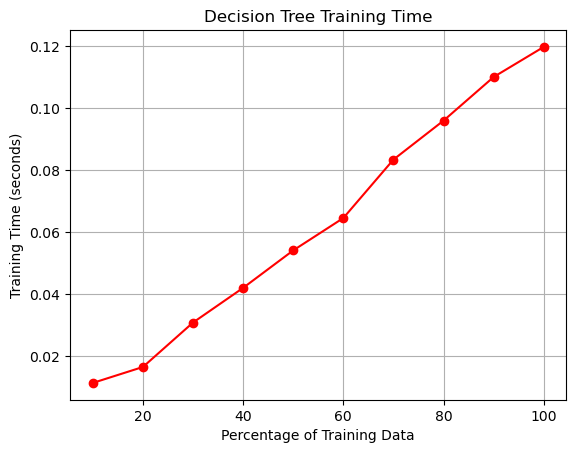

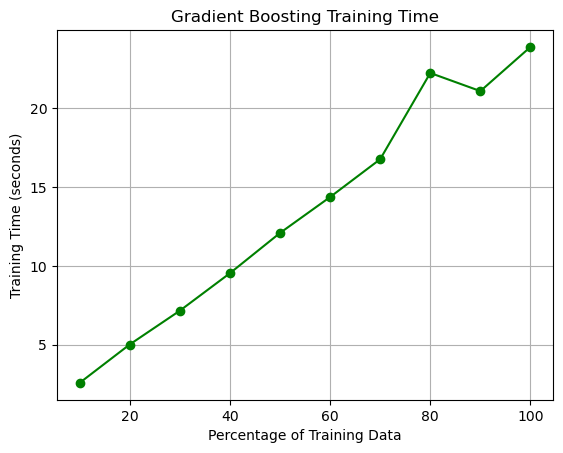

In [ ]:
plt.plot(result_final['Subset Percentage'], result_final['Decision Tree Training Time (s)'], label='Decision Tree', marker='o', linestyle='-', color='red')
plt.title('Decision Tree Training Time')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.show()

plt.plot(result_final['Subset Percentage'],result_final['Gradient Boosting Training Time (s)'], label='Gradient Boosting', marker='o', linestyle='-', color='green')
plt.title('Gradient Boosting Training Time')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.show()


# Problem2

**1. Does true negative matter for both the ROC and PR curve? Argue why each point on the ROC curve corresponds to a unique point on the PR curve.**



True negative does matter for the ROC but not PR.

For ROC, it is a trade off between TPR and FPR. Since $\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$, TN does matter in ROC.

For PR curve, it is a trade off between Recall and Precision which only focusing on the postive classes.



A point in ROC space defines a unique confusion matrix when the dataset is fixed since it includes all TP, TN, FP, FN. Although PR ignores the TN, we have TP, FP, FN which still can help to define a unique confusion matrix. Thus two curves contain exactly the same confusion matrix as long as Recall is not zero. If Recall = 0, positive cases are correctly classified, thus we can't identify the TN and FP.

**2. Select one OpenML dataset with 2 output classes. Use two binary classifiers (Adaboost and Logistic regression) and create ROC and PR curves for each of them. You will have two figures: one containing two ROC and the other containing two PR curves. Show the point where an all-positive classifier lies in the ROC and PR curves. An all-positive classifier classifies all the samples as positive. (10)**

In [ ]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt

file = 'dataset_31_credit-g.arff'
data, meta = arff.loadarff(file)
df = pd.DataFrame(data)
df.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

df['class'] = df['class'].apply(lambda x: 1 if x == b'good' else 0)

X = df.drop('class', axis=1)
y = df['class']




/Users/gaohan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


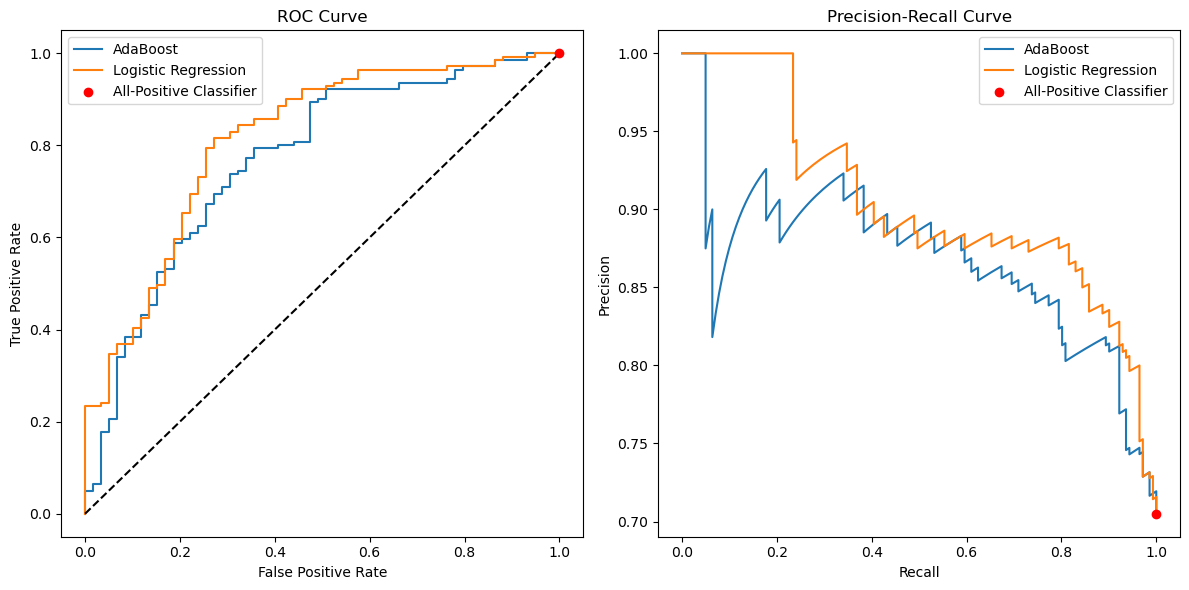

In [ ]:
# 对字符类型特征进行独热编码
X = pd.get_dummies(X, drop_first=True)

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征缩放
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 定义和初始化分类器
ada_clf = AdaBoostClassifier(n_estimators=300, random_state=42)
log_reg = LogisticRegression(C=0.1, max_iter=1000, random_state=42, class_weight='balanced')

# 训练模型
ada_clf.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# 预测概率
y_scores_ada = ada_clf.predict_proba(X_test)[:, 1]
y_scores_log = log_reg.predict_proba(X_test)[:, 1]

# 计算 ROC 和 PR 曲线的值
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_scores_ada)
fpr_log, tpr_log, _ = roc_curve(y_test, y_scores_log)
precision_ada, recall_ada, _ = precision_recall_curve(y_test, y_scores_ada)
precision_log, recall_log, _ = precision_recall_curve(y_test, y_scores_log)

# 计算全正分类器的点
all_positive = np.sum(y_test) / len(y_test)
all_positive_fpr, all_positive_tpr = 1.0, 1.0
all_positive_precision, all_positive_recall = all_positive, 1.0

# 绘制 ROC 曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr_ada, tpr_ada, label='AdaBoost')
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')  # 对角线
plt.scatter(all_positive_fpr, all_positive_tpr, color='red', label='All-Positive Classifier', zorder=5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# 绘制 PR 曲线
plt.subplot(1, 2, 2)
plt.plot(recall_ada, precision_ada, label='AdaBoost')
plt.plot(recall_log, precision_log, label='Logistic Regression')
plt.scatter(all_positive_recall, all_positive_precision, color='red', label='All-Positive Classifier', zorder=5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Problem 3


## Question 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
np.random.seed(42)
X_train = np.random.rand(10,2)
y_train = np.where(X_train[:, 0] > X_train[:, 1], 1, -1)
X_test = np.random.rand(5000,2)
y_test = np.where(X_test[:, 0] > X_test[:, 1], 1, -1)

In [ ]:

class Perceptron:
    def __init__(self, learning_rate=1.0, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None


    def model(self, x):
        return 1 if (np.dot(self.w, x)) > 0 else -1

    def fit(self, X, Y):

        self.w = np.zeros(X.shape[1])

        for _ in range(self.epochs):
            for xi, yi in zip(X, Y):
                y_pred = self.model(xi)

                if yi * y_pred <= 0:
                    self.w += self.learning_rate * yi * xi



    def predict(self, X):
        y_pred = [self.model(xi) for xi in X]
        return np.array(y_pred)


perceptron = Perceptron(learning_rate=1.0, epochs=1000)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Weights:", perceptron.w)


Test Accuracy: 0.9988
Weights: [ 1.56147991 -1.55678564]


## Question 2

In [ ]:
class HingeLossPerceptron:
    def __init__(self, learning_rate=0.5, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None


    def model(self, x):
        return 1 if (np.dot(self.w, x) ) > 0 else -1

    def fit(self, X, Y):
        self.w = np.zeros(X.shape[1])


        for _ in range(self.epochs):
            for xi, yi in zip(X, Y):
                y_pred = self.model(xi)
                if yi * (np.dot(self.w, xi) ) < 1:
                    self.w += self.learning_rate * yi * xi

    def predict(self, X):
        y_pred = [self.model(xi) for xi in X]
        return np.array(y_pred)

hinge_perceptron = HingeLossPerceptron(learning_rate=0.01, epochs=100000)
hinge_perceptron.fit(X_train, y_train)
y_pred = hinge_perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)


Test Accuracy: 0.9686


### Question 3

The Perceptron Criterion achieved a higher test accuracy. However, because our dataset is simple and small, and the data is linearly separable, the Perceptron Criterion is better suited to this simple linearly separable task. The advantage of the Hinge Loss may become more apparent as the data volume increases.

### Question 4

I believe that in the case of hinge loss, the loss function not only penalizes misclassified samples, but also penalizes correctly classified samples that are close to the boundary, thus learning a larger classification margin. This larger margin boundary can improve the model's generalization ability, making the model less sensitive to the specific selection of training data.

# Problem 4

### Question 1

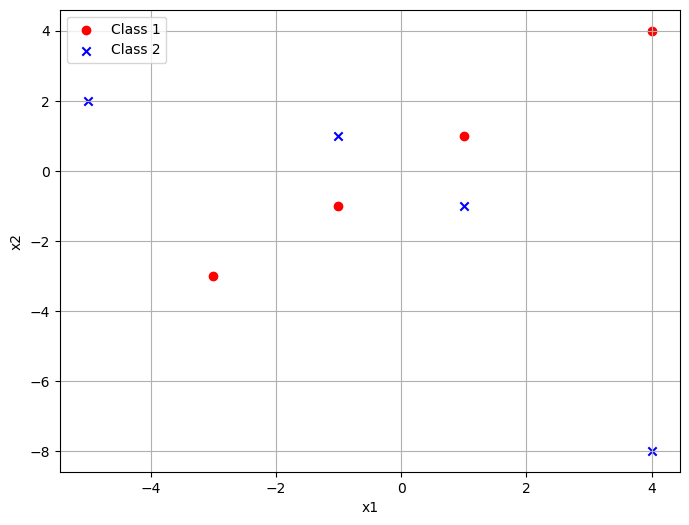

In [ ]:
class_1 = np.array([[-1, -1], [1, 1], [-3, -3], [4, 4]])
class_2 = np.array([[-1, 1], [1, -1], [-5, 2], [4, -8]])
plt.figure(figsize=(8, 6))

plt.scatter(class_1[:, 0], class_1[:, 1], color='red', marker='o', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', marker='x', label='Class 2')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

Base on the graph above, we can see that they are not linear separable since I can not find a line to category the blue and red dots.

### Question 2

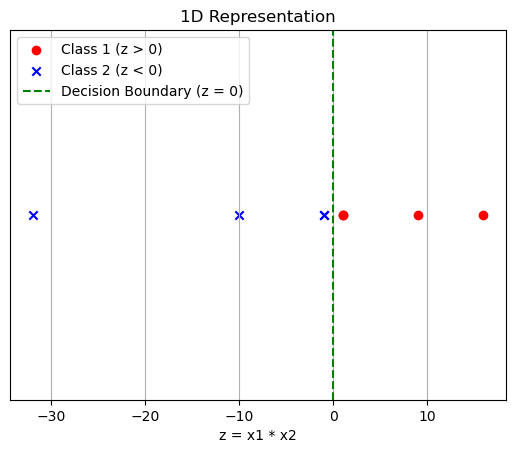

In [ ]:
z_class_1 = class_1[:, 0] * class_1[:, 1]
z_class_2 = class_2[:, 0] * class_2[:, 1]

plt.scatter(z_class_1, [1]*len(z_class_1), color='red', marker='o', label='Class 1 (z > 0)')
plt.scatter(z_class_2, [1]*len(z_class_2), color='blue', marker='x', label='Class 2 (z < 0)')

plt.axvline(x=0, color='green', linestyle='--', label='Decision Boundary (z = 0)')

plt.title('1D Representation')
plt.xlabel('z = x1 * x2')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()

Yes, I can. I used $z = x_1 \cdot x_2$, mapping the original two-dimensional features into a one-dimensional representation and plotted the graph above. Use \( z = 0 \) as the decision boundary. I found that all points in Class 1 are on the side where \( z > 0 \), while all points in Class 2 are on the side where \( z < 0 \). Thus the two classes can be perfectly separated by the decision boundary at \( z = 0 \)

### Question 3

As we knew,\( z = 0 \) is the decision boundary based on the above graph. In 1-dimensional space, the separating hyperplane is simply a threshold or boundary point, rather than a "plane" or "line." This is because in 1-dimensional space, there is no concept of a "plane"; only points can be used to separate different regions.
In my graph:
- Points in Class 1 are on the side where \( z > 0 \).
- Points in Class 2 are on the side where \( z < 0 \).

The separating hyperplane in this 1-dimensional space is represented by a single boundary point \( z = 0 \), which perfectly separates the two classes of data.

### Question 4

Nonlinear transformations are crucial in classification problems because they enable models to separate data that are not linearly separable in the original feature space. he
linear models to separate complex, non-linearly separable data by mapping it into a higher-dimensional space where the classes become linearly separable, increased separability and flexibility